## Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path, getcwd
from PIL import Image
from PIL import Image
% matplotlib inline

## Read the Data
### Datasets being read -  
- Marvel_wikia.csv : A dataset containing information about superheroes from Marvel comics
- DC_wikia.csv : A dataset containing information about superheroes from DC comics
- super_hero_powers.csv : A dataset containing information about powers of superheroes 

In [2]:
powers = pd.read_csv('super_hero_powers.csv')
marvel = pd.read_csv('Marvel_wikia.csv', index_col ='Unnamed: 0')
dc = pd.read_csv('DC_wikia.csv', index_col = 'Unnamed: 0')

## Data cleaning and formatting

Convert column names of each dataframe to lower case.

In [3]:
powers.columns = map(str.lower, powers.columns)
marvel.columns = map(str.lower, marvel.columns)
dc.columns = map(str.lower, dc.columns)

In [4]:
powers.head(1)

,hero_names,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Convert superhero names to lowercase


In [5]:
powers['hero_names'] = powers['hero_names'].str.lower().str.strip()

Calculate total number of powers each superhero has

In [6]:
powers['sum_powers'] = powers.sum(axis = 1)

In [7]:
powers.head(1)

,hero_names,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient,sum_powers
0,3-d man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4


Add publisher information for each comic

In [8]:
marvel['publisher'] = 'marvel'

In [9]:
dc['publisher'] = 'dc'

Superhero names have extra characters within round brackets. Simplify superhero name field.

In [10]:
marvel['name'] = marvel['name'].str.replace(r"\(.*\)","").str.lower().str.replace(r"W+","").str.strip()

In [11]:
dc['name'] = dc['name'].str.replace(r"\(.*\)","").str.lower().str.replace(r"W+","").str.strip()

## Concatenate both marvel and dc comics superhero information

In [12]:
marvel_dc = marvel.append(dc)

In [13]:
marvel_dc.head(2)

,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,year,publisher
0,1678,spider-man,\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,marvel
1,7139,captain america,\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,marvel


## Analysis 1
### Construct a timeline for a subset of superheroes to visualize their origins with respect to important historical events.

Retrieve rows for specific superheroes 

In [14]:
marvel_dc[(marvel_dc.name == 'batman') | (marvel_dc.name == 'superman') | (marvel_dc.name == 'captain america') | 
          (marvel_dc.name == 'flash') | (marvel_dc.name == 'hulk') | (marvel_dc.name == 'luke cage') | 
          (marvel_dc.name == 'frank castle') | (marvel_dc.name == 'iron man')]
## Retrieve rows by index since multiple rows can exist for the same hero (different universe). Retrieve year of origin as well.
heroes = marvel_dc.iloc[[1,3,7,36,37,16376,16377,16385],[1,12]].reset_index()
heroes.drop('index', axis = 1, inplace = True)
heroes.loc[heroes.name == 'superman', 'year'] = 1938 # Correct superman's year of origin
heroes

,name,year
0,captain america,1941.0
1,iron man,1963.0
2,hulk,1962.0
3,frank castle,1974.0
4,luke cage,1972.0
5,batman,1939.0
6,superman,1938.0
7,flash,1956.0


Create a dataframe for historical events. Leave the last event column blank for visualization purposes.

In [15]:
events = {'year': [1929, 1939, 1947, 1968, 1969, 1980],
'event':['Great depression', 'World war II', 'Cold war', 'Civil rights era', 'Vietnam War', ''],
'text':['The great Depression starts', 'World war II begins', 'Cold war begins', 'Civil rights act signed',
        'US troop withdrawal from Vietnam begins', '']}
history = pd.DataFrame(events)
history

,year,event,text
0,1929,Great depression,The great Depression starts
1,1939,World war II,World war II begins
2,1947,Cold war,Cold war begins
3,1968,Civil rights era,Civil rights act signed
4,1969,Vietnam War,US troop withdrawal from Vietnam begins
5,1980,,


In [16]:
init_notebook_mode(connected=True)
trace1 = go.Scatter(x = history.year, y = history.event, text = history.text, hoverinfo = 'none',
                    opacity =0.2, showlegend = False)
trace2 = go.Scatter(x = heroes.year.sort_values(),
                   y = ['Great depression', 'Great depression', 'World war II', 'Cold war', 'Cold war', 'Cold war',
                        'Civil rights era', 'Vietnam War'],
                   text = ['Superman : 1938', 'Batman : 1939', 'Captain America : 1941', 'The flash : 1956', 'The hulk: 1962',
                         'Iron man : 1963', 'Luke Cage : 1972', 'The punisher : 1974' ], hoverinfo = 'text', opacity = 0,
                         showlegend = False)

layout = go.Layout(
    title = 'The birth of superheroes : A timeline',
    width = 1200,
    height = 700,
    xaxis = dict(showticklabels = True, tickfont = dict(size = 12, color = 'black'), showgrid = True, zeroline = True,
               showline = True, mirror = 'ticks', gridcolor = '#bdbdbd', gridwidth = 2, zerolinecolor = '#969696',
                zerolinewidth = 4, linecolor = '#636363', linewidth = 6),
    yaxis = dict(showticklabels = False, showgrid = True, zeroline = True, showline = True, mirror = 'ticks',
                 gridcolor = '#bdbdbd', gridwidth = 2, zerolinecolor = '#969696', zerolinewidth = 4,
                 linecolor = '#636363', linewidth = 6),
    annotations = [
        dict(x = 1929, y = 'Great depression', xref = 'x', yref = 'y', text = 'The great Depression begins',
                      font = dict(size = 10, color = '#34495e'), align = 'center', arrowwidth = 2, bordercolor = '#c7c7c7',
                      borderwidth = 2, borderpad = 4, bgcolor = '#fbfcfc', opacity = 0.8),
        dict(x = 1939, y = 'World war II', xref = 'x', yref = 'y', text = 'World War II begins',
                      font = dict(size = 10, color = '#34495e'), align = 'center', arrowwidth = 2, bordercolor = '#c7c7c7',
                      borderwidth = 2, borderpad = 4, bgcolor = '#fbfcfc', opacity = 0.8),
        dict(x = 1947, y = 'Cold war', xref = 'x', yref = 'y', text = 'Cold war begins',
                      font = dict(size = 10, color = '#34495e'), align = 'center', arrowwidth = 2, bordercolor = '#c7c7c7',
                      borderwidth = 2, borderpad = 4, bgcolor = '#fbfcfc', opacity = 0.8),
        dict(x = 1968, y = 'Civil rights era', xref = 'x', yref = 'y', text = 'Civil rights act signed',
                      font = dict(size = 10, color = '#34495e'), align = 'center', arrowwidth = 2, bordercolor = '#c7c7c7',
                      borderwidth = 2, borderpad = 4, bgcolor = '#fbfcfc', opacity = 0.8),
        dict(x = 1969, y = 'Vietnam War', xref = 'x', yref = 'y', text = 'US troop withdrawal from Vietnam begins',
                      font = dict(size = 10, color = '#34495e'), align = 'center', arrowwidth = 2, ax = -50,
                      bordercolor = '#c7c7c7', borderwidth = 2, borderpad = 4, bgcolor = '#fbfcfc', opacity = 0.8)],
    
    images = [
        dict(source = "superman.png", xref = "x", yref = "y", x = 1938, y = 'Great depression', sizex = 2, sizey = 1,
             sizing = "stretch", xanchor = "right", yanchor = "bottom"),
        dict(source = "batman.png", xref = "x", yref = "y", x = 1939, y = 'Great depression', sizex = 2.5, sizey = 1,
             sizing = "stretch", xanchor = "left", yanchor = "bottom"),
        dict(source = "captain america.jpg",xref = "x", yref = "y", x = 1941, y = 'World war II', sizex = 2, sizey = 1,
             sizing = "stretch", xanchor = "left", yanchor = "bottom"),
        dict(source = "flash.png", xref = "x", yref = "y", x = 1956, y = 'Cold war', sizex = 2, sizey = 1, sizing = "stretch",
             xanchor = "right", yanchor = "bottom"),
        dict(source = "hulk.png", xref = "x", yref = "y", x = 1962, y = 'Cold war', sizex = 2, sizey = 1, sizing = "stretch",
             xanchor = "right", yanchor = "bottom"),
        dict(source = "iron man.png", xref = "x", yref = "y", x = 1963, y = 'Cold war', sizex = 2, sizey = 1, sizing = "stretch",
             xanchor = "left", yanchor = "bottom"),
        dict(source = "punisher.png", xref = "x", yref = "y", x = 1974, y = 'Vietnam War', sizex = 2, sizey = 1, 
             sizing = "stretch", xanchor = "right", yanchor = "bottom"),
        dict(source = "luke cage.png", xref = "x", yref = "y", x = 1972, y = 'Civil rights era', sizex = 2, sizey = 1,
             sizing = "stretch", xanchor = "right", yanchor = "bottom")])

fig = go.Figure(data = [trace1, trace2], layout = layout)
offline.iplot(fig, filename ='hero_origins.html')

### The plot shows how historical events preceed the origins of certain superheroes. These events helped shape the personas of these heroes. 
- The Great Depression led to the emergence of superheroes and specifically the two most culturally important ones, Superman and Batman. 
- The 2nd World War gave rise to a fictional war hero, Captain America.
- The Cold War and the ensuing arms race led to the imagination behind superheroes like the Flash, the Hulk and Iron Man. These heroes were either a by-product of experiments gone wrong or that of superior technology. 
- The Civil Rights movement saw the birth of Luke Cage. 
- Towards the end of the Vietnam war, troubled superheroes started taking shape. An example was the Punisher.

The x axis represents decades, the y axis stands for certain events as specified in the 'history' dataframe (y axis is turned off in the plot to simplify the visualization). The annotation boxes talk about the events, and on hovering above the image of a superhero, his/her year of origin can be viewed. 

## Generate Decade and Era information for each superhero

In [17]:
## create bins for decade
marvel_dc.loc[(marvel_dc.year >= 1930) & ((marvel_dc.year < 1940)), 'decade'] = 1930
marvel_dc.loc[(marvel_dc.year >= 1940) & ((marvel_dc.year < 1950)), 'decade'] = 1940
marvel_dc.loc[(marvel_dc.year >= 1950) & ((marvel_dc.year < 1960)), 'decade'] = 1950
marvel_dc.loc[(marvel_dc.year >= 1960) & ((marvel_dc.year < 1970)), 'decade'] = 1960
marvel_dc.loc[(marvel_dc.year >= 1970) & ((marvel_dc.year < 1980)), 'decade'] = 1970
marvel_dc.loc[(marvel_dc.year >= 1980) & ((marvel_dc.year < 1990)), 'decade'] = 1980
marvel_dc.loc[(marvel_dc.year >= 1990) & ((marvel_dc.year < 2000)), 'decade'] = 1990
marvel_dc.loc[(marvel_dc.year >= 2000) & ((marvel_dc.year < 2010)), 'decade'] = 2000
marvel_dc.loc[(marvel_dc.year >= 2010) & ((marvel_dc.year < 2018)), 'decade'] = 2010
## create bins for era
marvel_dc.loc[(marvel_dc.year >= 1930) & ((marvel_dc.year < 1960)), 'era'] = 'pre 1960s'
marvel_dc.loc[(marvel_dc.year >= 1960) & ((marvel_dc.year < 2000)), 'era'] = 'post 60s to 2000'
marvel_dc.loc[(marvel_dc.year >= 2000) & ((marvel_dc.year < 2018)), 'era'] = 'post Y2K'

## Analysis 2
### Analyze representation of gender by alignment in the comic book world.

How characters align under both DC and Marvel.

In [18]:
marvel_dc.groupby(['publisher', 'align'])[['name']].count()

name
publisher align                   
dc        Bad Characters      2895
          Good Characters     2832
          Neutral Characters   565
          Reformed Criminals     3
marvel    Bad Characters      6720
          Good Characters     4636
          Neutral Characters  2208

Under Marvel Comics, there is a vast difference between various character alignments. Expanding the analysis to explore how this  alignment varies across different genders under Marvel.

Categorize genders into two, 'Male Characters' and 'Other Genders'.

In [19]:
marvel_dc.loc[marvel_dc['sex'] != 'Male Characters', 'sex'] = 'Other Genders'

In [20]:
only_marvel = marvel_dc[marvel_dc['publisher'] == 'marvel']

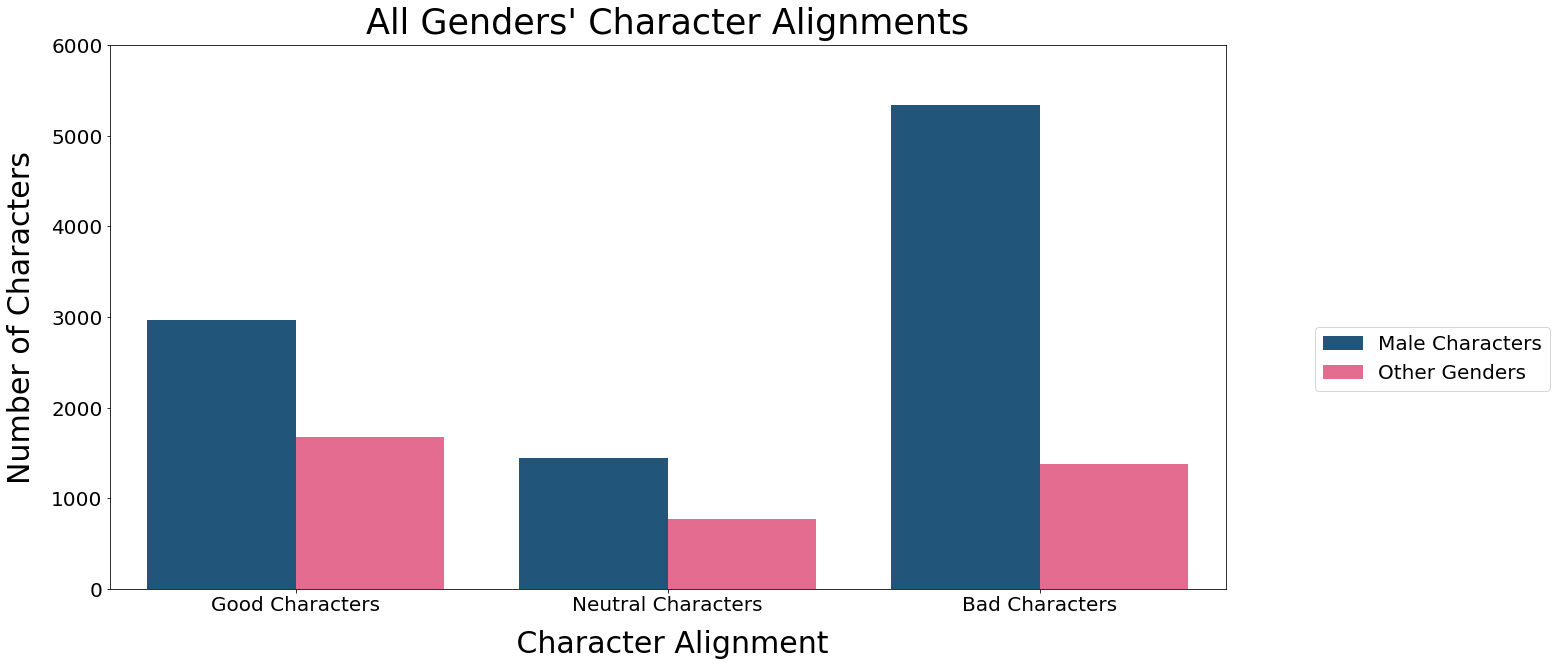

In [21]:
ytick = [0, 1000, 2000, 3000, 4000, 5000, 6000]
plt.figure(figsize = (20, 10))
sns.countplot(x= 'align', hue = 'sex', data = only_marvel, palette = ['#125888', '#F85888'])
plt.title("All Genders' Character Alignments", y = 1.01, fontsize = 35)
plt.xlabel(" Character Alignment", labelpad = 15, fontsize = 30)
plt.ylabel("Number of Characters", labelpad = 15, fontsize = 30)
plt.legend(fontsize = 20, loc = 'upper right', bbox_to_anchor = (1.3, 0.5))
plt.xticks(fontsize = 20)
plt.yticks(ytick,fontsize = 20)
plt.show()

### Bad characters in Marvel comics are mostly male, while the other genders have a more balanced distribution across gender alignment. It would be interesting to further analyze if there is a trend across decades for bad characters.

In [22]:
only_marvel_bad = only_marvel.loc[(only_marvel['align'] == 'Bad Characters'),['decade', 'sex']]
only_marvel_bad.dropna(inplace = True)

In [23]:
only_marvel_bad.loc[only_marvel_bad['sex'] == 'Male Characters', 'Male'] = 1
only_marvel_bad.loc[only_marvel_bad['sex'] == 'Male Characters', 'Other Genders'] = 0
only_marvel_bad.loc[only_marvel_bad['sex'] == 'Other Genders', 'Other Genders'] = 1
only_marvel_bad.loc[only_marvel_bad['sex'] == 'Other Genders', 'Male'] = 0

In [24]:
decade_ratio = only_marvel_bad.groupby('decade')['Male', 'Other Genders'].mean().reset_index()

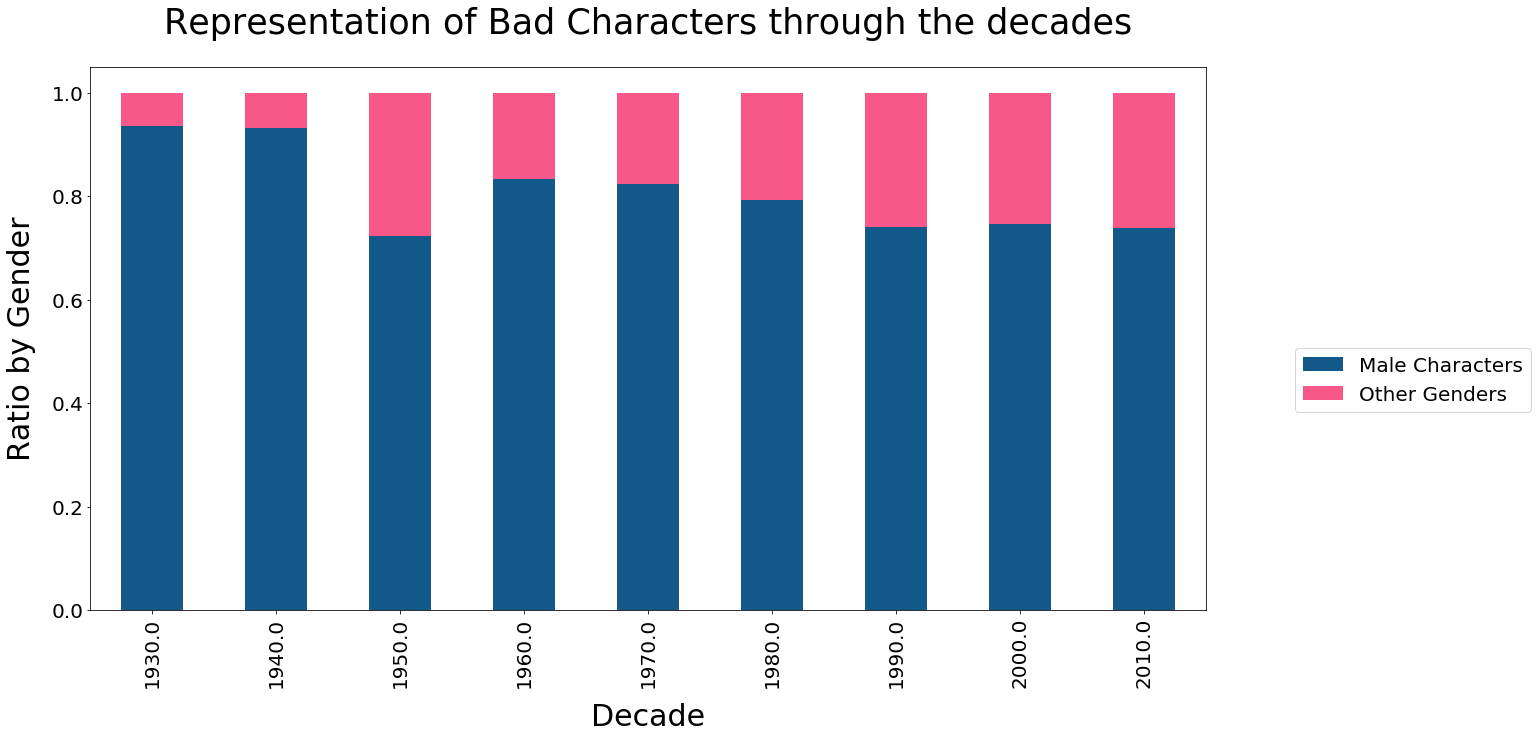

In [25]:
decade_ratio.plot(kind = 'bar', x = 'decade', figsize = (20, 10), stacked = True, color = ['#125888', '#F85888'])
plt.title("Representation of Bad Characters through the decades", y = 1.05, fontsize = 35)
plt.xlabel("Decade", labelpad = 15, fontsize = 30)
plt.ylabel("Ratio by Gender", labelpad = 15, fontsize = 30)
plt.legend(labels=['Male Characters', 'Other Genders'], fontsize = 20, loc='upper right', bbox_to_anchor=(1.3, 0.5))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### There has been an upward trend in representation of other genders when it comes to negative characters, through the decades. The proportion greatly improves starting the 60s, right around the time when various women centric movements started gaining momentum. However, the representation is still not balanced near 50-50 like it would be if it were truly representative. 
The numbers from 50s seem slightly skewed because overall very few superheroes were introduced in the 50s.

The x axis represents decades, the y axis stands for the ratio of 'bad' superheroes by gender. 

## Analysis 3 
### Analyze representation of sexuality in the comic book world.

In [26]:
sexual_orientation = marvel_dc[['era', 'gsm']]

In [27]:
sexual_orientation.loc[sexual_orientation.gsm.isnull(), 'gsm'] = 'Straight'
sexual_orientation.loc[sexual_orientation.gsm != 'Straight', 'gsm'] = 'Other orientation'
orientation_era = sexual_orientation.groupby(['era', 'gsm']).size().reset_index().rename(columns = {0: 'count'})

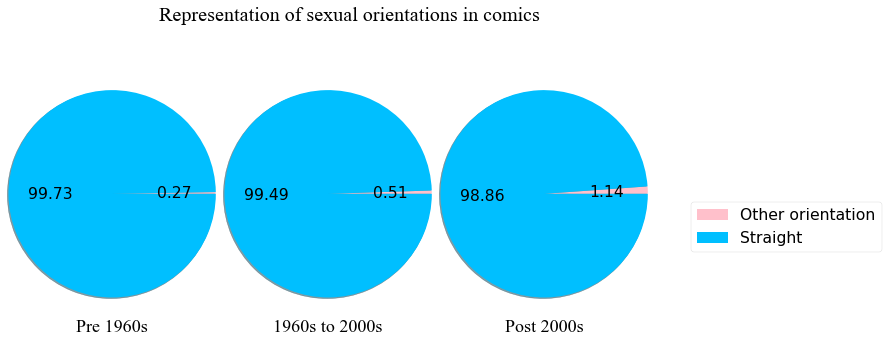

In [28]:
sns.set_context('talk')

fig = plt.gcf()
fig.suptitle('Representation of sexual orientations in comics', x = 0.8, y = 0.9, size = 20, family = "Times New Roman")

labels = ['Other orientation', 'Straight']
ax1 = fig.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(x = orientation_era[orientation_era.era == 'pre 1960s']['count'], autopct = '%.2f', radius = 1.8,
        colors = ['pink', 'deepskyblue'], shadow = True)
ax1.set_title('Pre 1960s', y = -0.5, size = 18, family = "Times New Roman")
ax2 = fig.add_axes([.5, .0, .5, .5], aspect = 1)
ax2.pie(x = orientation_era[orientation_era.era == 'post 60s to 2000']['count'], autopct = '%.2f', radius = 1.8,
        colors = ['pink', 'deepskyblue'], shadow = True)
ax2.set_title('1960s to 2000s', y = -0.5, size = 18, family = "Times New Roman")
ax3 = fig.add_axes([1, .0, .5, .5], aspect = 1)
ax3.pie(x = orientation_era[orientation_era.era == 'post Y2K']['count'], autopct = '%.2f', radius = 1.8,
        colors = ['pink', 'deepskyblue'], shadow = True)
ax3.set_title('Post 2000s', y = -0.5, size = 18, family = "Times New Roman")
ax3.legend(labels = labels, fontsize = 'medium', loc = 'upper right', bbox_to_anchor = (2.9, 0.5))
plt.show()

### Representation of sexual minorities marginally improves over time but it is still abysmally low. 
Each pie chart depcits representation of sexual minorities in different eras, pre 60s, 60s to the 2000s and post 2000.

## Analysis 4
### Analyze what super powers do most heroes possess.

In [29]:
wcpowers = powers.drop('hero_names', axis = 1)
powers_list = list(wcpowers.columns)[:-1]
number_of_powers_list = list(wcpowers.sum_powers)

In [30]:
text = []
for i in range(len(powers_list)):
    iterator = number_of_powers_list[i]
    for n in range(iterator):
        text.append(powers_list[i])
powers_text = ' '.join(text)

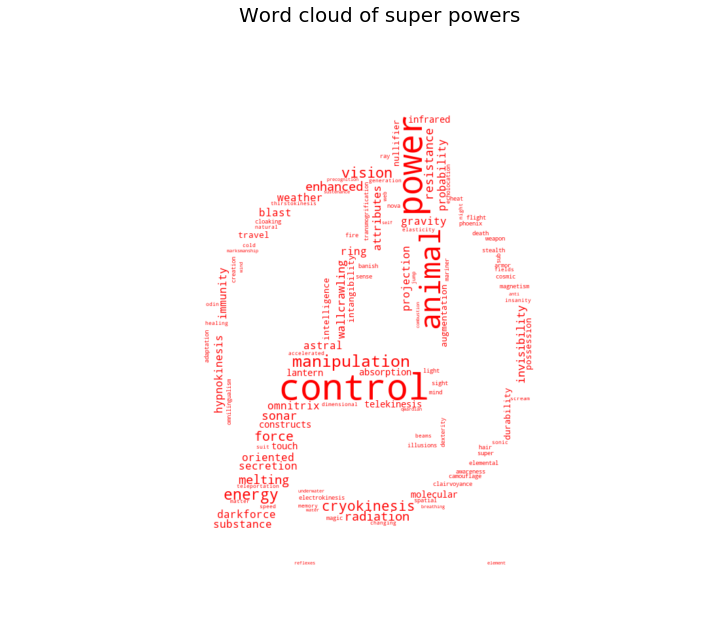

In [31]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(255, 0, 0)" 
d = getcwd()
mask = np.array(Image.open(path.join(d, "avengers.jpg")))
wc = WordCloud(mask = mask, collocations = False, min_font_size = 7, random_state = 42, background_color = 'white') 
wc.generate(powers_text)
plt.figure(figsize = (12,12))
plt.imshow(wc.recolor(color_func=red_color_func, random_state=3), interpolation = "bilinear")
plt.title('Word cloud of super powers', y = 1.05, fontsize = 20)
plt.axis("off")
plt.show()

### The worldcloud above gives an idea regarding the most popular superpower descriptions. Control, animal, power, and manipulation are all standard, but interestingly common powers such as flight are lost in the myriad power descriptions used. 

### Comparing Marvel v DC top grossing movies

In [32]:
marvel_movies = {'Title': ['Avengers: Infinity War', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'Iron Man 3'],
                          'Worldwide Gross': [2041.08, 1518.81, 1405.40, 1346.55, 1214.81]}
dc_movies = {'Title': ['The Dark Knight Rises', 'The Dark Knight', 'BvS: Dawn of Justice',
                       'Wonder Woman', 'Suicide Squad'], 
             'Worldwide Gross': [1084.94, 1004.56, 873.63, 821.85, 746.85]}

In [33]:
marvel_movies_df = pd.DataFrame(data = marvel_movies)
dc_movies_df = pd.DataFrame(data = dc_movies).sort_values('Worldwide Gross', ascending = True)

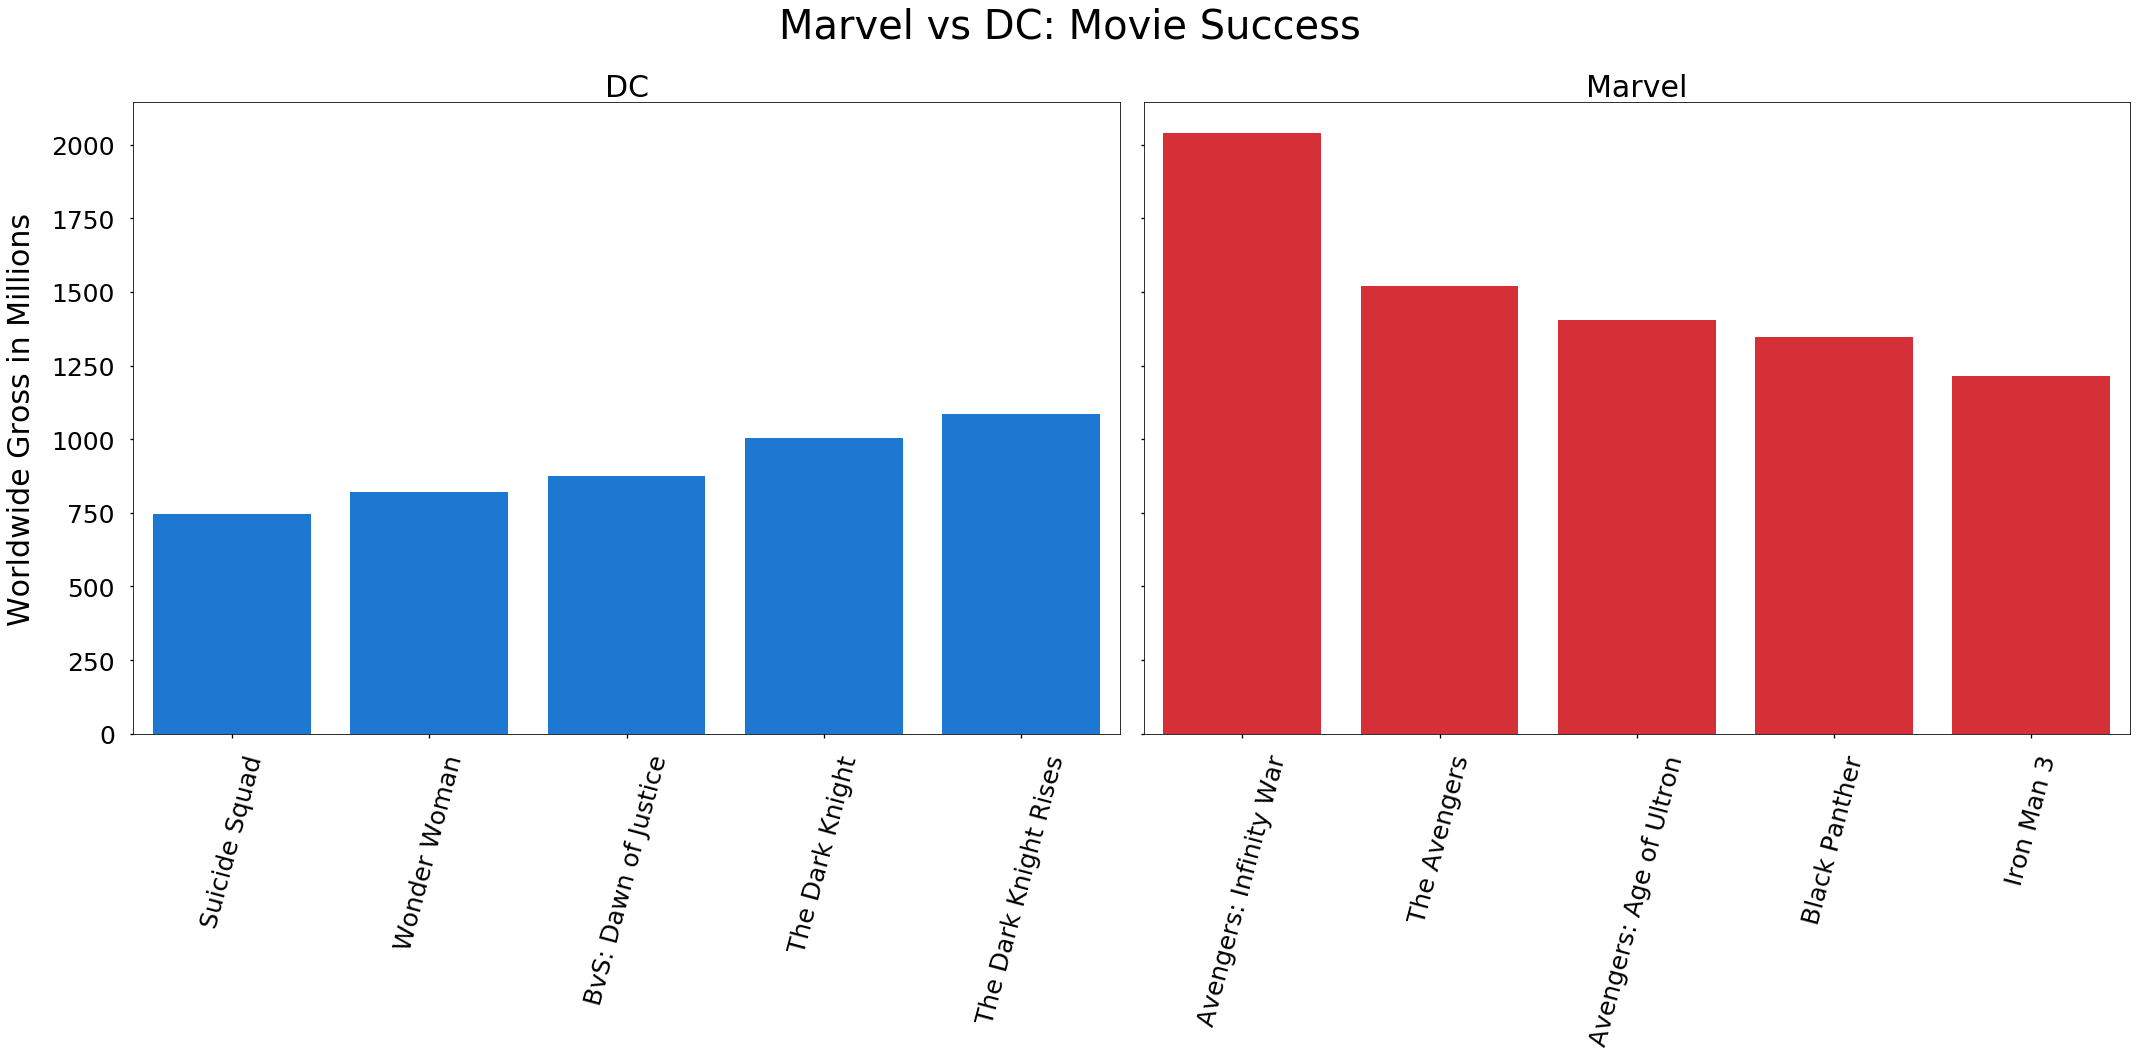

In [34]:
fig, ax = plt.subplots(figsize = (30, 14))
fig.suptitle('Marvel vs DC: Movie Success', fontsize = 40, y = 1.05)
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x = 'Title', y = 'Worldwide Gross', data = dc_movies_df, color = '#0078F0')
plt.title('DC', size = 30)
plt.xlabel('')
ax1.set_ylabel('Worldwide Gross in Millions', size = 30, labelpad = 15)
ax1.tick_params(axis = 'both', pad = 15, labelsize = 25)
plt.xticks(rotation = '75')

plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.setp(ax2.get_yticklabels(), visible = False)
sns.barplot(x = 'Title', y = 'Worldwide Gross', data = marvel_movies_df, color = '#F0141E')
plt.title('Marvel', size = 30)
ax2.tick_params(axis = 'both', pad = 15, labelsize = 25)
plt.xticks(rotation = '75')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.close()

### Overall Marvel movies have vastly outperformed movies based on DC comics. In fact the 5th highest grossing Marvel movie has made more money than the highest grossing DC movie!